In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Read_Lammps_files import Analyze_LAMMPS

In [12]:
# constants in hartree unite system:
kB=3.166811563E-6 
K_harm=1.21647924E-8
# mass=0.00054858
mass=1

# Example with potential energy

In [21]:
PotEng = []
for bhw in range(1,7):
    url = '32par/g0/bhw'+str(bhw)
    anz = Analyze_LAMMPS(24,url)
    anz.avg_logfiles()
    Pot=anz.AVG_logFiles['PotEng'].values
    remove=int(0.3*len(Pot))
    PotEng.append([Pot[remove:].mean()])

100%|███████████████████████████████████████████| 24/24 [00:20<00:00,  1.18it/s]


Text(0, 0.5, 'U/$\\hbar\\omega$')

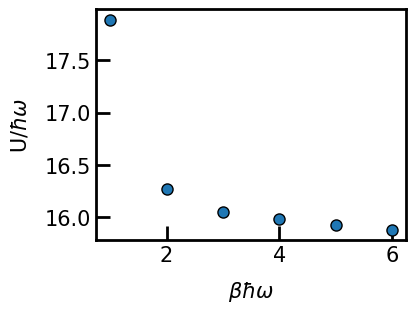

In [22]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(np.arange(1,7),np.array(PotEng)/np.sqrt(K_harm),'o',markeredgecolor='k',ms=8)
ax.set_xlabel(r'$\beta\hbar\omega$', labelpad=10)
ax.set_ylabel(r'U/$\hbar\omega$', labelpad=10)

# Total Energy Calculation

In [19]:
#PotEng, KinEng, TotEng = [], [], []
G = ['g0','g1','g3','g6','g8','g16']
E=[]
particles='3par'
for g in G:
    url=particles+'/'+g
    anz = Analyze_LAMMPS(72,url)
    anz.avg_logfiles()
    df_total = anz.AVG_logFiles
    PotEng, Kin = df_total['PotEng'].values, df_total['v_newvir'].values
    PotEng, Kin = PotEng[20000:].mean(), 72*Kin[20000:].mean()
    E.append([PotEng+Kin])
E_vs_g=pd.DataFrame({'g':np.array([int(i[1:]) for i in G]),'E':np.array(E).flatten()})
E_vs_g.to_csv(particles+'_E_vs_g.csv',index=False)

100%|███████████████████████████████████████████| 72/72 [01:19<00:00,  1.10s/it]


Text(0, 0.5, 'E/$\\hbar\\omega$')

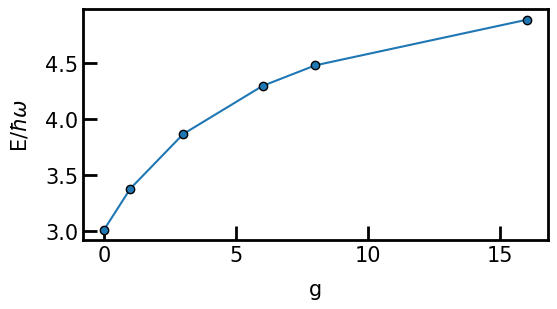

In [20]:
fig, ax = plt.subplots(figsize=(6,3))
df=pd.read_csv(particles+'_E_vs_g.csv')
x, y = df.values[:,0],df.values[:,1]
ax.plot(x, y/np.sqrt(K_harm),'-o',markeredgecolor='k')
ax.set_xlabel(r'g', labelpad=10)
ax.set_ylabel(r'E/$\hbar\omega$', labelpad=10)

# Density

In [33]:
particles = '3par'
g = 'g1'
url=particles+'/'+g
anz = Analyze_LAMMPS(72,url)
anz.density_Histogram(output_name=particles+'_'+g+'density.csv')

100%|███████████████████████████████████████████| 72/72 [01:02<00:00,  1.16it/s]


Text(0, 0.5, '$\\rho$(r)')

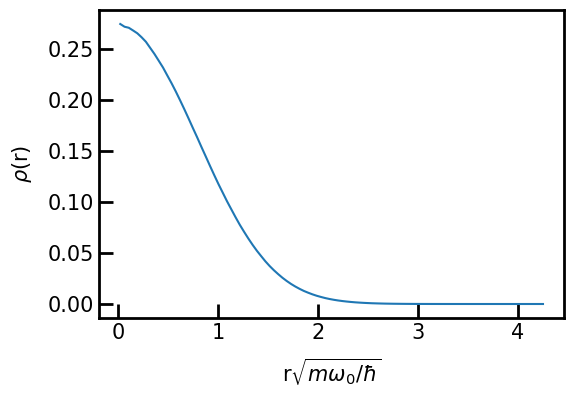

In [39]:
fig, ax = plt.subplots(figsize=(6,4))
df=pd.read_csv(particles+'_'+g+'density.csv')
x, y = df['R'].values,df['2D_counts'].values
ax.plot(x*K_harm**0.25,y/K_harm**0.5)
ax.set_xlabel(r'r$\sqrt{m\omega_0/\hbar}$', labelpad=10)
ax.set_ylabel(r'$\rho$(r)', labelpad=10)

# RDF

In [27]:
particles = '3par'
g = 'g1'
url=particles+'/'+g
anz = Analyze_LAMMPS(72,url)
anz.RDF(output_name=particles+'_'+g+'RDF.csv')

100%|███████████████████████████████████████████| 72/72 [01:20<00:00,  1.12s/it]


Text(0, 0.5, 'g(r)')

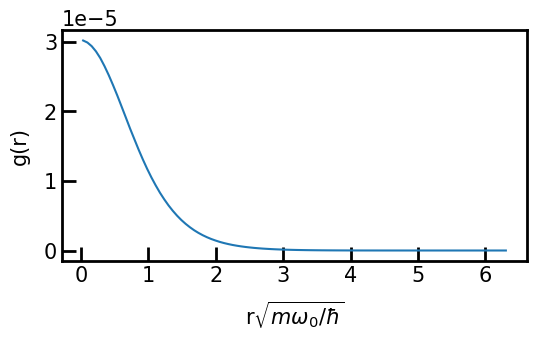

In [32]:
fig, ax = plt.subplots(figsize=(6,3))
df=pd.read_csv(particles+'_'+g+'RDF.csv')
x, y = df['Rij'].values,df['2D_counts'].values
ax.plot(x*K_harm**0.25,y)
ax.set_xlabel(r'r$\sqrt{m\omega_0/\hbar}$', labelpad=10)
ax.set_ylabel(r'g(r)', labelpad=10)